In [1]:
import sys
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from xgboost import plot_importance, plot_tree, to_graphviz
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
'''config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)'''

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'config = tf.ConfigProto()\nconfig.gpu_options.allow_growth = True\nsess = tf.Session(config = config)'

In [28]:
def load_data():
    data = pd.read_csv("./tor_old.csv")
    x_train = data.drop(["tor"], axis=1)
    #x_train = x_train.drop(x_train.columns[[60,59,58,57,56,55,50,49,45,33,32,31,43, 44, 30, 48, 47, 51, 46, 67, 70 ,0, 74]], axis = 1)
    x_train = x_train.iloc[:,[6,52, 40, 53, 8,39,54,12,18,41,62,42,64,5,4,1,36,10,15,37,23,34,20]]
    y_train = data["tor"]
    data1 = pd.read_csv("./tor_new.csv")
    x_test = data1.drop(["tor"], axis=1)
    #x_test = x_test.drop(x_test.columns[[60,59,58,57,56,55,50,49,45,33,32,31,43, 44, 30, 48, 47, 51, 46, 67, 70 ,0, 74]], axis = 1)
    x_test = x_test.iloc[:,[6,52, 40, 53, 8,39,54,12,18,41,62,42,64,5,4,1,36,10,15,37,23,34,20]]
    y_test = data1["tor"]
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12345)
    '''x_train = train.drop(["vpn"], axis=1)
    y_train = train["vpn"]
    x_test = test.drop(["vpn"], axis=1)
    y_test = test["vpn"]'''
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    print("x_train:",x_train.shape)
    print("y_train:",y_train.shape)
    print("x_test:",x_test.shape)
    print("y_test:",y_test.shape)
    return (x_train, y_train), (x_test, y_test)

In [70]:
def trainandtest(X_train, Y_train, X_test, Y_test):
    iter_times = 10000
    #model = XGBClassifier(max_depth=20, n_estimators=2048, learning_rate=0.01)
    #model.fit(X_train, Y_train.flatten())
    #model = XGBClassifier(max_depth=3, n_estimators=iter_times, learning_rate=0.01)
    model = XGBClassifier(max_depth=3, subsample=0.5,gamma=1,
             colsample_bytree=0.5, n_estimators=iter_times, learning_rate=0.01)
    '''model = XGBClassifier(
             learning_rate =0.01,
             n_estimators=iter_times,
             max_depth=3,
             min_child_weight=50,
             gamma=3,
             subsample=0.5,
             colsample_bytree=0.5,
             nthread=4,
             scale_pos_weight=1,
             eta = 0.1,
             seed=27)'''
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.1)
    #model = XGBClassifier()
    '''learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
    param_grid = dict(learning_rate=learning_rate)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
    grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
    grid_result = grid_search.fit(X_train, Y_train)
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    model = XGBClassifier(n_estimators=10000, learning_rate=grid_result.best_params_['learning_rate'])'''
    
    eval_set = [(x_test, y_test)]
    model.fit(x_train, y_train, early_stopping_rounds=iter_times*0.1, eval_metric="logloss", eval_set=eval_set, verbose=True)
    #model.fit(X_train, Y_train, eval_metric="rmse", eval_set=eval_set, verbose=True)

    '''plot_importance(model)
    plt.show()
    plt.savefig('sample_maxdipth10.png',dpi=3600)
    
    predict_train = model.predict(X_train)
    acc_train = np.mean(Y_train.flatten() == predict_train)
    print("acc_train = ", acc_train)
    predict_test = model.predict(X_test)
    acc_test = np.mean(Y_test.flatten() == predict_test)
    print("acc_test = ", acc_test)'''
    return model

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape)
#x_train, x_test = nor(x_train, x_test)
x_train = np.array(x_train,dtype=np.long)
x_test = np.array(x_test,dtype=np.long)
#x_train = preprocessing.scale(x_train)
#x_test = preprocessing.scale(x_test)
y_test = np.array(y_test,dtype=np.int)
y_train = np.array(y_train,dtype=np.int)

model = trainandtest(x_train, y_train, x_test, y_test)

x_train: (41473, 23)
y_train: (41473,)
x_test: (812, 23)
y_test: (812,)
(41473, 23)
[0]	validation_0-logloss:0.683923
Will train until validation_0-logloss hasn't improved in 1000.0 rounds.
[1]	validation_0-logloss:0.674879
[2]	validation_0-logloss:0.665958
[3]	validation_0-logloss:0.657267


/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


[4]	validation_0-logloss:0.648735
[5]	validation_0-logloss:0.640359
[6]	validation_0-logloss:0.632114
[7]	validation_0-logloss:0.624046
[8]	validation_0-logloss:0.616128
[9]	validation_0-logloss:0.608381
[10]	validation_0-logloss:0.600753
[11]	validation_0-logloss:0.593243
[12]	validation_0-logloss:0.585889
[13]	validation_0-logloss:0.578646
[14]	validation_0-logloss:0.571552
[15]	validation_0-logloss:0.564561
[16]	validation_0-logloss:0.557719
[17]	validation_0-logloss:0.551002
[18]	validation_0-logloss:0.544375
[19]	validation_0-logloss:0.537874
[20]	validation_0-logloss:0.531475
[21]	validation_0-logloss:0.525191
[22]	validation_0-logloss:0.519015
[23]	validation_0-logloss:0.512928
[24]	validation_0-logloss:0.506951
[25]	validation_0-logloss:0.501092
[26]	validation_0-logloss:0.495286
[27]	validation_0-logloss:0.489565
[28]	validation_0-logloss:0.483972
[29]	validation_0-logloss:0.478451
[30]	validation_0-logloss:0.473065
[31]	validation_0-logloss:0.467739
[32]	validation_0-logloss:

[236]	validation_0-logloss:0.103371
[237]	validation_0-logloss:0.102952
[238]	validation_0-logloss:0.102523
[239]	validation_0-logloss:0.102131
[240]	validation_0-logloss:0.101703
[241]	validation_0-logloss:0.101322
[242]	validation_0-logloss:0.100924
[243]	validation_0-logloss:0.100458
[244]	validation_0-logloss:0.100086
[245]	validation_0-logloss:0.099665
[246]	validation_0-logloss:0.099276
[247]	validation_0-logloss:0.098884
[248]	validation_0-logloss:0.09849
[249]	validation_0-logloss:0.098098
[250]	validation_0-logloss:0.097739
[251]	validation_0-logloss:0.097371
[252]	validation_0-logloss:0.097024
[253]	validation_0-logloss:0.096679
[254]	validation_0-logloss:0.096347
[255]	validation_0-logloss:0.095991
[256]	validation_0-logloss:0.095629
[257]	validation_0-logloss:0.095287
[258]	validation_0-logloss:0.094921
[259]	validation_0-logloss:0.094571
[260]	validation_0-logloss:0.094238
[261]	validation_0-logloss:0.093893
[262]	validation_0-logloss:0.093562
[263]	validation_0-logloss:0.

[465]	validation_0-logloss:0.059418
[466]	validation_0-logloss:0.059268
[467]	validation_0-logloss:0.059203
[468]	validation_0-logloss:0.059097
[469]	validation_0-logloss:0.059034
[470]	validation_0-logloss:0.058961
[471]	validation_0-logloss:0.058867
[472]	validation_0-logloss:0.058832
[473]	validation_0-logloss:0.058692
[474]	validation_0-logloss:0.058631
[475]	validation_0-logloss:0.05861
[476]	validation_0-logloss:0.058566
[477]	validation_0-logloss:0.05852
[478]	validation_0-logloss:0.058417
[479]	validation_0-logloss:0.05834
[480]	validation_0-logloss:0.058313
[481]	validation_0-logloss:0.058249
[482]	validation_0-logloss:0.058189
[483]	validation_0-logloss:0.05811
[484]	validation_0-logloss:0.058017
[485]	validation_0-logloss:0.057953
[486]	validation_0-logloss:0.057854
[487]	validation_0-logloss:0.057805
[488]	validation_0-logloss:0.057758
[489]	validation_0-logloss:0.057716
[490]	validation_0-logloss:0.057693
[491]	validation_0-logloss:0.057622
[492]	validation_0-logloss:0.057

[694]	validation_0-logloss:0.047473
[695]	validation_0-logloss:0.047411
[696]	validation_0-logloss:0.047406
[697]	validation_0-logloss:0.047379
[698]	validation_0-logloss:0.047359
[699]	validation_0-logloss:0.047326
[700]	validation_0-logloss:0.047267
[701]	validation_0-logloss:0.04725
[702]	validation_0-logloss:0.047206
[703]	validation_0-logloss:0.04718
[704]	validation_0-logloss:0.047137
[705]	validation_0-logloss:0.047073
[706]	validation_0-logloss:0.046974
[707]	validation_0-logloss:0.046939
[708]	validation_0-logloss:0.046912
[709]	validation_0-logloss:0.046876
[710]	validation_0-logloss:0.046831
[711]	validation_0-logloss:0.046805
[712]	validation_0-logloss:0.046726
[713]	validation_0-logloss:0.046654
[714]	validation_0-logloss:0.046604
[715]	validation_0-logloss:0.046578
[716]	validation_0-logloss:0.046559
[717]	validation_0-logloss:0.046541
[718]	validation_0-logloss:0.046455
[719]	validation_0-logloss:0.046425
[720]	validation_0-logloss:0.046381
[721]	validation_0-logloss:0.0

[923]	validation_0-logloss:0.041216
[924]	validation_0-logloss:0.041214
[925]	validation_0-logloss:0.041206
[926]	validation_0-logloss:0.041193
[927]	validation_0-logloss:0.041182
[928]	validation_0-logloss:0.04115
[929]	validation_0-logloss:0.041125
[930]	validation_0-logloss:0.041101
[931]	validation_0-logloss:0.041079
[932]	validation_0-logloss:0.041075
[933]	validation_0-logloss:0.041051
[934]	validation_0-logloss:0.041021
[935]	validation_0-logloss:0.041015
[936]	validation_0-logloss:0.040993
[937]	validation_0-logloss:0.040968
[938]	validation_0-logloss:0.040962
[939]	validation_0-logloss:0.040949
[940]	validation_0-logloss:0.040917
[941]	validation_0-logloss:0.04091
[942]	validation_0-logloss:0.040886
[943]	validation_0-logloss:0.040877
[944]	validation_0-logloss:0.040844
[945]	validation_0-logloss:0.040836
[946]	validation_0-logloss:0.040819
[947]	validation_0-logloss:0.040797
[948]	validation_0-logloss:0.040794
[949]	validation_0-logloss:0.040781
[950]	validation_0-logloss:0.0

[1148]	validation_0-logloss:0.038054
[1149]	validation_0-logloss:0.038047
[1150]	validation_0-logloss:0.038035
[1151]	validation_0-logloss:0.03802
[1152]	validation_0-logloss:0.038001
[1153]	validation_0-logloss:0.037979
[1154]	validation_0-logloss:0.037965
[1155]	validation_0-logloss:0.037962
[1156]	validation_0-logloss:0.03795
[1157]	validation_0-logloss:0.037938
[1158]	validation_0-logloss:0.037925
[1159]	validation_0-logloss:0.03792
[1160]	validation_0-logloss:0.03791
[1161]	validation_0-logloss:0.037891
[1162]	validation_0-logloss:0.037873
[1163]	validation_0-logloss:0.037868
[1164]	validation_0-logloss:0.03786
[1165]	validation_0-logloss:0.03785
[1166]	validation_0-logloss:0.037841
[1167]	validation_0-logloss:0.03783
[1168]	validation_0-logloss:0.037828
[1169]	validation_0-logloss:0.037823
[1170]	validation_0-logloss:0.037823
[1171]	validation_0-logloss:0.03782
[1172]	validation_0-logloss:0.037818
[1173]	validation_0-logloss:0.037814
[1174]	validation_0-logloss:0.037811
[1175]	va

[1371]	validation_0-logloss:0.035902
[1372]	validation_0-logloss:0.035894
[1373]	validation_0-logloss:0.035883
[1374]	validation_0-logloss:0.035878
[1375]	validation_0-logloss:0.035872
[1376]	validation_0-logloss:0.035866
[1377]	validation_0-logloss:0.035861
[1378]	validation_0-logloss:0.035853
[1379]	validation_0-logloss:0.035856
[1380]	validation_0-logloss:0.035853
[1381]	validation_0-logloss:0.035845
[1382]	validation_0-logloss:0.035841
[1383]	validation_0-logloss:0.035833
[1384]	validation_0-logloss:0.035825
[1385]	validation_0-logloss:0.035822
[1386]	validation_0-logloss:0.035815
[1387]	validation_0-logloss:0.03581
[1388]	validation_0-logloss:0.035795
[1389]	validation_0-logloss:0.035791
[1390]	validation_0-logloss:0.035787
[1391]	validation_0-logloss:0.035782
[1392]	validation_0-logloss:0.035773
[1393]	validation_0-logloss:0.03577
[1394]	validation_0-logloss:0.035756
[1395]	validation_0-logloss:0.035752
[1396]	validation_0-logloss:0.035744
[1397]	validation_0-logloss:0.03574
[139

[1593]	validation_0-logloss:0.034423
[1594]	validation_0-logloss:0.034423
[1595]	validation_0-logloss:0.034416
[1596]	validation_0-logloss:0.034404
[1597]	validation_0-logloss:0.034403
[1598]	validation_0-logloss:0.034381
[1599]	validation_0-logloss:0.034369
[1600]	validation_0-logloss:0.034364
[1601]	validation_0-logloss:0.034353
[1602]	validation_0-logloss:0.034349
[1603]	validation_0-logloss:0.03435
[1604]	validation_0-logloss:0.034339
[1605]	validation_0-logloss:0.034337
[1606]	validation_0-logloss:0.034329
[1607]	validation_0-logloss:0.034326
[1608]	validation_0-logloss:0.034318
[1609]	validation_0-logloss:0.034316
[1610]	validation_0-logloss:0.034305
[1611]	validation_0-logloss:0.034295
[1612]	validation_0-logloss:0.034288
[1613]	validation_0-logloss:0.034282
[1614]	validation_0-logloss:0.034277
[1615]	validation_0-logloss:0.034269
[1616]	validation_0-logloss:0.034259
[1617]	validation_0-logloss:0.034253
[1618]	validation_0-logloss:0.034231
[1619]	validation_0-logloss:0.034216
[1

[1816]	validation_0-logloss:0.033287
[1817]	validation_0-logloss:0.033279
[1818]	validation_0-logloss:0.033271
[1819]	validation_0-logloss:0.033264
[1820]	validation_0-logloss:0.033259
[1821]	validation_0-logloss:0.03323
[1822]	validation_0-logloss:0.033226
[1823]	validation_0-logloss:0.033216
[1824]	validation_0-logloss:0.033213
[1825]	validation_0-logloss:0.033211
[1826]	validation_0-logloss:0.0332
[1827]	validation_0-logloss:0.033194
[1828]	validation_0-logloss:0.033196
[1829]	validation_0-logloss:0.03319
[1830]	validation_0-logloss:0.033181
[1831]	validation_0-logloss:0.033173
[1832]	validation_0-logloss:0.033172
[1833]	validation_0-logloss:0.03317
[1834]	validation_0-logloss:0.033161
[1835]	validation_0-logloss:0.033158
[1836]	validation_0-logloss:0.033143
[1837]	validation_0-logloss:0.033133
[1838]	validation_0-logloss:0.033127
[1839]	validation_0-logloss:0.033116
[1840]	validation_0-logloss:0.033107
[1841]	validation_0-logloss:0.033104
[1842]	validation_0-logloss:0.033103
[1843]

[2039]	validation_0-logloss:0.032268
[2040]	validation_0-logloss:0.032265
[2041]	validation_0-logloss:0.03226
[2042]	validation_0-logloss:0.032257
[2043]	validation_0-logloss:0.032247
[2044]	validation_0-logloss:0.032235
[2045]	validation_0-logloss:0.032229
[2046]	validation_0-logloss:0.032231
[2047]	validation_0-logloss:0.032229
[2048]	validation_0-logloss:0.032218
[2049]	validation_0-logloss:0.032214
[2050]	validation_0-logloss:0.032209
[2051]	validation_0-logloss:0.032186
[2052]	validation_0-logloss:0.03219
[2053]	validation_0-logloss:0.032196
[2054]	validation_0-logloss:0.032194
[2055]	validation_0-logloss:0.03219
[2056]	validation_0-logloss:0.032182
[2057]	validation_0-logloss:0.032188
[2058]	validation_0-logloss:0.032183
[2059]	validation_0-logloss:0.032182
[2060]	validation_0-logloss:0.03218
[2061]	validation_0-logloss:0.032182
[2062]	validation_0-logloss:0.032178
[2063]	validation_0-logloss:0.032179
[2064]	validation_0-logloss:0.032174
[2065]	validation_0-logloss:0.032173
[2066

[2262]	validation_0-logloss:0.031486
[2263]	validation_0-logloss:0.031484
[2264]	validation_0-logloss:0.031485
[2265]	validation_0-logloss:0.031482
[2266]	validation_0-logloss:0.031482
[2267]	validation_0-logloss:0.031482
[2268]	validation_0-logloss:0.031468
[2269]	validation_0-logloss:0.031468
[2270]	validation_0-logloss:0.031459
[2271]	validation_0-logloss:0.031453
[2272]	validation_0-logloss:0.031451
[2273]	validation_0-logloss:0.031445
[2274]	validation_0-logloss:0.031439
[2275]	validation_0-logloss:0.031436
[2276]	validation_0-logloss:0.031432
[2277]	validation_0-logloss:0.031421
[2278]	validation_0-logloss:0.031422
[2279]	validation_0-logloss:0.031421
[2280]	validation_0-logloss:0.031421
[2281]	validation_0-logloss:0.03142
[2282]	validation_0-logloss:0.031404
[2283]	validation_0-logloss:0.031393
[2284]	validation_0-logloss:0.031397
[2285]	validation_0-logloss:0.031393
[2286]	validation_0-logloss:0.031376
[2287]	validation_0-logloss:0.031374
[2288]	validation_0-logloss:0.031371
[2

[2484]	validation_0-logloss:0.030733
[2485]	validation_0-logloss:0.030723
[2486]	validation_0-logloss:0.030727
[2487]	validation_0-logloss:0.030719
[2488]	validation_0-logloss:0.030716
[2489]	validation_0-logloss:0.030709
[2490]	validation_0-logloss:0.030703
[2491]	validation_0-logloss:0.030698
[2492]	validation_0-logloss:0.030699
[2493]	validation_0-logloss:0.030697
[2494]	validation_0-logloss:0.03069
[2495]	validation_0-logloss:0.03069
[2496]	validation_0-logloss:0.030688
[2497]	validation_0-logloss:0.030684
[2498]	validation_0-logloss:0.030691
[2499]	validation_0-logloss:0.030685
[2500]	validation_0-logloss:0.030682
[2501]	validation_0-logloss:0.030682
[2502]	validation_0-logloss:0.030681
[2503]	validation_0-logloss:0.030674
[2504]	validation_0-logloss:0.030668
[2505]	validation_0-logloss:0.030662
[2506]	validation_0-logloss:0.030662
[2507]	validation_0-logloss:0.030662
[2508]	validation_0-logloss:0.030667
[2509]	validation_0-logloss:0.030669
[2510]	validation_0-logloss:0.030661
[25

[2707]	validation_0-logloss:0.030096
[2708]	validation_0-logloss:0.030092
[2709]	validation_0-logloss:0.030091
[2710]	validation_0-logloss:0.030091
[2711]	validation_0-logloss:0.030077
[2712]	validation_0-logloss:0.030075
[2713]	validation_0-logloss:0.030073
[2714]	validation_0-logloss:0.030068
[2715]	validation_0-logloss:0.030067
[2716]	validation_0-logloss:0.030062
[2717]	validation_0-logloss:0.030058
[2718]	validation_0-logloss:0.030058
[2719]	validation_0-logloss:0.030048
[2720]	validation_0-logloss:0.030042
[2721]	validation_0-logloss:0.030046
[2722]	validation_0-logloss:0.030045
[2723]	validation_0-logloss:0.030042
[2724]	validation_0-logloss:0.030038
[2725]	validation_0-logloss:0.030038
[2726]	validation_0-logloss:0.030034
[2727]	validation_0-logloss:0.030035
[2728]	validation_0-logloss:0.030021
[2729]	validation_0-logloss:0.030017
[2730]	validation_0-logloss:0.030017
[2731]	validation_0-logloss:0.030015
[2732]	validation_0-logloss:0.030016
[2733]	validation_0-logloss:0.030018
[

[2929]	validation_0-logloss:0.029638
[2930]	validation_0-logloss:0.029642
[2931]	validation_0-logloss:0.029641
[2932]	validation_0-logloss:0.029642
[2933]	validation_0-logloss:0.02964
[2934]	validation_0-logloss:0.029631
[2935]	validation_0-logloss:0.029632
[2936]	validation_0-logloss:0.029633
[2937]	validation_0-logloss:0.029628
[2938]	validation_0-logloss:0.02962
[2939]	validation_0-logloss:0.029619
[2940]	validation_0-logloss:0.029612
[2941]	validation_0-logloss:0.029611
[2942]	validation_0-logloss:0.029608
[2943]	validation_0-logloss:0.029609
[2944]	validation_0-logloss:0.029615
[2945]	validation_0-logloss:0.029613
[2946]	validation_0-logloss:0.029612
[2947]	validation_0-logloss:0.029605
[2948]	validation_0-logloss:0.029608
[2949]	validation_0-logloss:0.029609
[2950]	validation_0-logloss:0.029601
[2951]	validation_0-logloss:0.029607
[2952]	validation_0-logloss:0.029609
[2953]	validation_0-logloss:0.029611
[2954]	validation_0-logloss:0.029603
[2955]	validation_0-logloss:0.029602
[29

[3152]	validation_0-logloss:0.029191
[3153]	validation_0-logloss:0.02919
[3154]	validation_0-logloss:0.029188
[3155]	validation_0-logloss:0.029188
[3156]	validation_0-logloss:0.029187
[3157]	validation_0-logloss:0.029185
[3158]	validation_0-logloss:0.029186
[3159]	validation_0-logloss:0.029187
[3160]	validation_0-logloss:0.029189
[3161]	validation_0-logloss:0.029193
[3162]	validation_0-logloss:0.029192
[3163]	validation_0-logloss:0.029186
[3164]	validation_0-logloss:0.029185
[3165]	validation_0-logloss:0.029183
[3166]	validation_0-logloss:0.02918
[3167]	validation_0-logloss:0.029176
[3168]	validation_0-logloss:0.02917
[3169]	validation_0-logloss:0.029169
[3170]	validation_0-logloss:0.029174
[3171]	validation_0-logloss:0.029166
[3172]	validation_0-logloss:0.029168
[3173]	validation_0-logloss:0.029168
[3174]	validation_0-logloss:0.029166
[3175]	validation_0-logloss:0.029171
[3176]	validation_0-logloss:0.029167
[3177]	validation_0-logloss:0.029165
[3178]	validation_0-logloss:0.029167
[317

[3374]	validation_0-logloss:0.028954
[3375]	validation_0-logloss:0.028957
[3376]	validation_0-logloss:0.028955
[3377]	validation_0-logloss:0.028952
[3378]	validation_0-logloss:0.02895
[3379]	validation_0-logloss:0.028952
[3380]	validation_0-logloss:0.028949
[3381]	validation_0-logloss:0.028954
[3382]	validation_0-logloss:0.028952
[3383]	validation_0-logloss:0.028954
[3384]	validation_0-logloss:0.02895
[3385]	validation_0-logloss:0.02895
[3386]	validation_0-logloss:0.028947
[3387]	validation_0-logloss:0.028944
[3388]	validation_0-logloss:0.028942
[3389]	validation_0-logloss:0.028937
[3390]	validation_0-logloss:0.028932
[3391]	validation_0-logloss:0.028924
[3392]	validation_0-logloss:0.028916
[3393]	validation_0-logloss:0.028908
[3394]	validation_0-logloss:0.0289
[3395]	validation_0-logloss:0.028899
[3396]	validation_0-logloss:0.028896
[3397]	validation_0-logloss:0.028893
[3398]	validation_0-logloss:0.028889
[3399]	validation_0-logloss:0.028896
[3400]	validation_0-logloss:0.028893
[3401]

[3597]	validation_0-logloss:0.028695
[3598]	validation_0-logloss:0.028698
[3599]	validation_0-logloss:0.028706
[3600]	validation_0-logloss:0.02871
[3601]	validation_0-logloss:0.028706
[3602]	validation_0-logloss:0.028706
[3603]	validation_0-logloss:0.028704
[3604]	validation_0-logloss:0.028702
[3605]	validation_0-logloss:0.028697
[3606]	validation_0-logloss:0.0287
[3607]	validation_0-logloss:0.028702
[3608]	validation_0-logloss:0.028699
[3609]	validation_0-logloss:0.028701
[3610]	validation_0-logloss:0.028702
[3611]	validation_0-logloss:0.028704
[3612]	validation_0-logloss:0.028705
[3613]	validation_0-logloss:0.0287
[3614]	validation_0-logloss:0.028695
[3615]	validation_0-logloss:0.028695
[3616]	validation_0-logloss:0.028689
[3617]	validation_0-logloss:0.028685
[3618]	validation_0-logloss:0.02868
[3619]	validation_0-logloss:0.028681
[3620]	validation_0-logloss:0.028682
[3621]	validation_0-logloss:0.028684
[3622]	validation_0-logloss:0.028688
[3623]	validation_0-logloss:0.028683
[3624]	

[3820]	validation_0-logloss:0.028446
[3821]	validation_0-logloss:0.028447
[3822]	validation_0-logloss:0.028436
[3823]	validation_0-logloss:0.028434
[3824]	validation_0-logloss:0.028436
[3825]	validation_0-logloss:0.028436
[3826]	validation_0-logloss:0.028426
[3827]	validation_0-logloss:0.028422
[3828]	validation_0-logloss:0.028418
[3829]	validation_0-logloss:0.028416
[3830]	validation_0-logloss:0.02842
[3831]	validation_0-logloss:0.028414
[3832]	validation_0-logloss:0.02841
[3833]	validation_0-logloss:0.028404
[3834]	validation_0-logloss:0.02841
[3835]	validation_0-logloss:0.028409
[3836]	validation_0-logloss:0.028409
[3837]	validation_0-logloss:0.028404
[3838]	validation_0-logloss:0.0284
[3839]	validation_0-logloss:0.028401
[3840]	validation_0-logloss:0.028394
[3841]	validation_0-logloss:0.028396
[3842]	validation_0-logloss:0.028398
[3843]	validation_0-logloss:0.028397
[3844]	validation_0-logloss:0.028399
[3845]	validation_0-logloss:0.028392
[3846]	validation_0-logloss:0.028394
[3847]

[4043]	validation_0-logloss:0.028172
[4044]	validation_0-logloss:0.028169
[4045]	validation_0-logloss:0.028168
[4046]	validation_0-logloss:0.028167
[4047]	validation_0-logloss:0.028162
[4048]	validation_0-logloss:0.028163
[4049]	validation_0-logloss:0.028165
[4050]	validation_0-logloss:0.02816
[4051]	validation_0-logloss:0.028159
[4052]	validation_0-logloss:0.028158
[4053]	validation_0-logloss:0.028151
[4054]	validation_0-logloss:0.028154
[4055]	validation_0-logloss:0.02815
[4056]	validation_0-logloss:0.028153
[4057]	validation_0-logloss:0.028151
[4058]	validation_0-logloss:0.028157
[4059]	validation_0-logloss:0.02816
[4060]	validation_0-logloss:0.028156
[4061]	validation_0-logloss:0.028153
[4062]	validation_0-logloss:0.028159
[4063]	validation_0-logloss:0.028159
[4064]	validation_0-logloss:0.028154
[4065]	validation_0-logloss:0.028152
[4066]	validation_0-logloss:0.028148
[4067]	validation_0-logloss:0.028146
[4068]	validation_0-logloss:0.028149
[4069]	validation_0-logloss:0.028147
[407

[4266]	validation_0-logloss:0.02801
[4267]	validation_0-logloss:0.028011
[4268]	validation_0-logloss:0.028008
[4269]	validation_0-logloss:0.02801
[4270]	validation_0-logloss:0.028003
[4271]	validation_0-logloss:0.028002
[4272]	validation_0-logloss:0.027998
[4273]	validation_0-logloss:0.028005
[4274]	validation_0-logloss:0.027998
[4275]	validation_0-logloss:0.027995
[4276]	validation_0-logloss:0.027996
[4277]	validation_0-logloss:0.028
[4278]	validation_0-logloss:0.027997
[4279]	validation_0-logloss:0.027993
[4280]	validation_0-logloss:0.02799
[4281]	validation_0-logloss:0.02799
[4282]	validation_0-logloss:0.027987
[4283]	validation_0-logloss:0.027989
[4284]	validation_0-logloss:0.02799
[4285]	validation_0-logloss:0.027988
[4286]	validation_0-logloss:0.027985
[4287]	validation_0-logloss:0.027991
[4288]	validation_0-logloss:0.027991
[4289]	validation_0-logloss:0.027994
[4290]	validation_0-logloss:0.027991
[4291]	validation_0-logloss:0.02799
[4292]	validation_0-logloss:0.027985
[4293]	val

[4489]	validation_0-logloss:0.027686
[4490]	validation_0-logloss:0.027687
[4491]	validation_0-logloss:0.027689
[4492]	validation_0-logloss:0.027687
[4493]	validation_0-logloss:0.027687
[4494]	validation_0-logloss:0.027681
[4495]	validation_0-logloss:0.02768
[4496]	validation_0-logloss:0.027678
[4497]	validation_0-logloss:0.027674
[4498]	validation_0-logloss:0.027674
[4499]	validation_0-logloss:0.027674
[4500]	validation_0-logloss:0.027665
[4501]	validation_0-logloss:0.027663
[4502]	validation_0-logloss:0.027663
[4503]	validation_0-logloss:0.027658
[4504]	validation_0-logloss:0.027658
[4505]	validation_0-logloss:0.027655
[4506]	validation_0-logloss:0.027658
[4507]	validation_0-logloss:0.027663
[4508]	validation_0-logloss:0.027661
[4509]	validation_0-logloss:0.027661
[4510]	validation_0-logloss:0.027655
[4511]	validation_0-logloss:0.027651
[4512]	validation_0-logloss:0.027648
[4513]	validation_0-logloss:0.027649
[4514]	validation_0-logloss:0.02765
[4515]	validation_0-logloss:0.027643
[45

[4711]	validation_0-logloss:0.027523
[4712]	validation_0-logloss:0.027524
[4713]	validation_0-logloss:0.027527
[4714]	validation_0-logloss:0.027523
[4715]	validation_0-logloss:0.027517
[4716]	validation_0-logloss:0.027521
[4717]	validation_0-logloss:0.027517
[4718]	validation_0-logloss:0.027516
[4719]	validation_0-logloss:0.027515
[4720]	validation_0-logloss:0.027507
[4721]	validation_0-logloss:0.027504
[4722]	validation_0-logloss:0.027503
[4723]	validation_0-logloss:0.0275
[4724]	validation_0-logloss:0.027496
[4725]	validation_0-logloss:0.027495
[4726]	validation_0-logloss:0.027495
[4727]	validation_0-logloss:0.027494
[4728]	validation_0-logloss:0.027494
[4729]	validation_0-logloss:0.027499
[4730]	validation_0-logloss:0.027497
[4731]	validation_0-logloss:0.027495
[4732]	validation_0-logloss:0.027495
[4733]	validation_0-logloss:0.027493
[4734]	validation_0-logloss:0.027493
[4735]	validation_0-logloss:0.027491
[4736]	validation_0-logloss:0.027487
[4737]	validation_0-logloss:0.027491
[47

[4933]	validation_0-logloss:0.027413
[4934]	validation_0-logloss:0.027409
[4935]	validation_0-logloss:0.02741
[4936]	validation_0-logloss:0.027416
[4937]	validation_0-logloss:0.027418
[4938]	validation_0-logloss:0.027418
[4939]	validation_0-logloss:0.027421
[4940]	validation_0-logloss:0.027418
[4941]	validation_0-logloss:0.027417
[4942]	validation_0-logloss:0.027413
[4943]	validation_0-logloss:0.02741
[4944]	validation_0-logloss:0.02741
[4945]	validation_0-logloss:0.027408
[4946]	validation_0-logloss:0.027404
[4947]	validation_0-logloss:0.0274
[4948]	validation_0-logloss:0.0274
[4949]	validation_0-logloss:0.027403
[4950]	validation_0-logloss:0.027398
[4951]	validation_0-logloss:0.027397
[4952]	validation_0-logloss:0.027399
[4953]	validation_0-logloss:0.027392
[4954]	validation_0-logloss:0.027385
[4955]	validation_0-logloss:0.027389
[4956]	validation_0-logloss:0.027388
[4957]	validation_0-logloss:0.02739
[4958]	validation_0-logloss:0.02739
[4959]	validation_0-logloss:0.027391
[4960]	val

[5156]	validation_0-logloss:0.027234
[5157]	validation_0-logloss:0.027235
[5158]	validation_0-logloss:0.027233
[5159]	validation_0-logloss:0.02723
[5160]	validation_0-logloss:0.027227
[5161]	validation_0-logloss:0.027222
[5162]	validation_0-logloss:0.027219
[5163]	validation_0-logloss:0.027221
[5164]	validation_0-logloss:0.027221
[5165]	validation_0-logloss:0.027223
[5166]	validation_0-logloss:0.027223
[5167]	validation_0-logloss:0.027221
[5168]	validation_0-logloss:0.027221
[5169]	validation_0-logloss:0.027221
[5170]	validation_0-logloss:0.027225
[5171]	validation_0-logloss:0.027229
[5172]	validation_0-logloss:0.027228
[5173]	validation_0-logloss:0.027221
[5174]	validation_0-logloss:0.027222
[5175]	validation_0-logloss:0.027217
[5176]	validation_0-logloss:0.027209
[5177]	validation_0-logloss:0.027215
[5178]	validation_0-logloss:0.027223
[5179]	validation_0-logloss:0.027221
[5180]	validation_0-logloss:0.027217
[5181]	validation_0-logloss:0.027213
[5182]	validation_0-logloss:0.027208
[5

[5379]	validation_0-logloss:0.027032
[5380]	validation_0-logloss:0.027032
[5381]	validation_0-logloss:0.027027
[5382]	validation_0-logloss:0.027025
[5383]	validation_0-logloss:0.027026
[5384]	validation_0-logloss:0.027026
[5385]	validation_0-logloss:0.027026
[5386]	validation_0-logloss:0.027023
[5387]	validation_0-logloss:0.027026
[5388]	validation_0-logloss:0.027024
[5389]	validation_0-logloss:0.027025
[5390]	validation_0-logloss:0.027026
[5391]	validation_0-logloss:0.027026
[5392]	validation_0-logloss:0.027024
[5393]	validation_0-logloss:0.027025
[5394]	validation_0-logloss:0.027017
[5395]	validation_0-logloss:0.02701
[5396]	validation_0-logloss:0.027013
[5397]	validation_0-logloss:0.027013
[5398]	validation_0-logloss:0.027008
[5399]	validation_0-logloss:0.027007
[5400]	validation_0-logloss:0.027008
[5401]	validation_0-logloss:0.027011
[5402]	validation_0-logloss:0.027009
[5403]	validation_0-logloss:0.027007
[5404]	validation_0-logloss:0.027007
[5405]	validation_0-logloss:0.027007
[5

[5602]	validation_0-logloss:0.02695
[5603]	validation_0-logloss:0.026952
[5604]	validation_0-logloss:0.02695
[5605]	validation_0-logloss:0.026943
[5606]	validation_0-logloss:0.026946
[5607]	validation_0-logloss:0.026944
[5608]	validation_0-logloss:0.02694
[5609]	validation_0-logloss:0.026942
[5610]	validation_0-logloss:0.026946
[5611]	validation_0-logloss:0.02694
[5612]	validation_0-logloss:0.026936
[5613]	validation_0-logloss:0.026934
[5614]	validation_0-logloss:0.026932
[5615]	validation_0-logloss:0.026931
[5616]	validation_0-logloss:0.026928
[5617]	validation_0-logloss:0.026922
[5618]	validation_0-logloss:0.026921
[5619]	validation_0-logloss:0.026919
[5620]	validation_0-logloss:0.026921
[5621]	validation_0-logloss:0.026925
[5622]	validation_0-logloss:0.026929
[5623]	validation_0-logloss:0.026934
[5624]	validation_0-logloss:0.026931
[5625]	validation_0-logloss:0.026936
[5626]	validation_0-logloss:0.026936
[5627]	validation_0-logloss:0.026938
[5628]	validation_0-logloss:0.026943
[5629

[5824]	validation_0-logloss:0.026837
[5825]	validation_0-logloss:0.026836
[5826]	validation_0-logloss:0.026837
[5827]	validation_0-logloss:0.026834
[5828]	validation_0-logloss:0.026832
[5829]	validation_0-logloss:0.026829
[5830]	validation_0-logloss:0.026828
[5831]	validation_0-logloss:0.026826
[5832]	validation_0-logloss:0.026827
[5833]	validation_0-logloss:0.026826
[5834]	validation_0-logloss:0.026828
[5835]	validation_0-logloss:0.026823
[5836]	validation_0-logloss:0.026824
[5837]	validation_0-logloss:0.026822
[5838]	validation_0-logloss:0.026827
[5839]	validation_0-logloss:0.026827
[5840]	validation_0-logloss:0.02683
[5841]	validation_0-logloss:0.026835
[5842]	validation_0-logloss:0.026837
[5843]	validation_0-logloss:0.026842
[5844]	validation_0-logloss:0.026842
[5845]	validation_0-logloss:0.026845
[5846]	validation_0-logloss:0.026838
[5847]	validation_0-logloss:0.026842
[5848]	validation_0-logloss:0.026835
[5849]	validation_0-logloss:0.026836
[5850]	validation_0-logloss:0.026833
[5

[6046]	validation_0-logloss:0.026755
[6047]	validation_0-logloss:0.026752
[6048]	validation_0-logloss:0.026757
[6049]	validation_0-logloss:0.026756
[6050]	validation_0-logloss:0.02676
[6051]	validation_0-logloss:0.026761
[6052]	validation_0-logloss:0.026767
[6053]	validation_0-logloss:0.026769
[6054]	validation_0-logloss:0.026768
[6055]	validation_0-logloss:0.026767
[6056]	validation_0-logloss:0.02676
[6057]	validation_0-logloss:0.02676
[6058]	validation_0-logloss:0.026758
[6059]	validation_0-logloss:0.026751
[6060]	validation_0-logloss:0.026747
[6061]	validation_0-logloss:0.026743
[6062]	validation_0-logloss:0.026737
[6063]	validation_0-logloss:0.026731
[6064]	validation_0-logloss:0.026734
[6065]	validation_0-logloss:0.026732
[6066]	validation_0-logloss:0.026733
[6067]	validation_0-logloss:0.026729
[6068]	validation_0-logloss:0.026728
[6069]	validation_0-logloss:0.02673
[6070]	validation_0-logloss:0.02673
[6071]	validation_0-logloss:0.026737
[6072]	validation_0-logloss:0.02674
[6073]	

[6269]	validation_0-logloss:0.026659
[6270]	validation_0-logloss:0.026657
[6271]	validation_0-logloss:0.026651
[6272]	validation_0-logloss:0.026648
[6273]	validation_0-logloss:0.02665
[6274]	validation_0-logloss:0.026652
[6275]	validation_0-logloss:0.026654
[6276]	validation_0-logloss:0.026651
[6277]	validation_0-logloss:0.026657
[6278]	validation_0-logloss:0.026655
[6279]	validation_0-logloss:0.026656
[6280]	validation_0-logloss:0.026651
[6281]	validation_0-logloss:0.026643
[6282]	validation_0-logloss:0.026641
[6283]	validation_0-logloss:0.026642
[6284]	validation_0-logloss:0.026644
[6285]	validation_0-logloss:0.026646
[6286]	validation_0-logloss:0.026647
[6287]	validation_0-logloss:0.026656
[6288]	validation_0-logloss:0.026661
[6289]	validation_0-logloss:0.026663
[6290]	validation_0-logloss:0.026658
[6291]	validation_0-logloss:0.026662
[6292]	validation_0-logloss:0.026661
[6293]	validation_0-logloss:0.026655
[6294]	validation_0-logloss:0.026659
[6295]	validation_0-logloss:0.026659
[6

[6492]	validation_0-logloss:0.026575
[6493]	validation_0-logloss:0.026575
[6494]	validation_0-logloss:0.026572
[6495]	validation_0-logloss:0.02657
[6496]	validation_0-logloss:0.026571
[6497]	validation_0-logloss:0.026567
[6498]	validation_0-logloss:0.026572
[6499]	validation_0-logloss:0.026571
[6500]	validation_0-logloss:0.026579
[6501]	validation_0-logloss:0.026582
[6502]	validation_0-logloss:0.026586
[6503]	validation_0-logloss:0.026584
[6504]	validation_0-logloss:0.026591
[6505]	validation_0-logloss:0.026594
[6506]	validation_0-logloss:0.026594
[6507]	validation_0-logloss:0.026594
[6508]	validation_0-logloss:0.026599
[6509]	validation_0-logloss:0.026601
[6510]	validation_0-logloss:0.0266
[6511]	validation_0-logloss:0.0266
[6512]	validation_0-logloss:0.026602
[6513]	validation_0-logloss:0.026607
[6514]	validation_0-logloss:0.026602
[6515]	validation_0-logloss:0.026604
[6516]	validation_0-logloss:0.026603
[6517]	validation_0-logloss:0.0266
[6518]	validation_0-logloss:0.026596
[6519]	v

[6715]	validation_0-logloss:0.026532
[6716]	validation_0-logloss:0.026536
[6717]	validation_0-logloss:0.026537
[6718]	validation_0-logloss:0.026534
[6719]	validation_0-logloss:0.026529
[6720]	validation_0-logloss:0.026529
[6721]	validation_0-logloss:0.026527
[6722]	validation_0-logloss:0.026526
[6723]	validation_0-logloss:0.026526
[6724]	validation_0-logloss:0.026523
[6725]	validation_0-logloss:0.026517
[6726]	validation_0-logloss:0.026515
[6727]	validation_0-logloss:0.026515
[6728]	validation_0-logloss:0.02652
[6729]	validation_0-logloss:0.02652
[6730]	validation_0-logloss:0.026516
[6731]	validation_0-logloss:0.026516
[6732]	validation_0-logloss:0.026518
[6733]	validation_0-logloss:0.026521
[6734]	validation_0-logloss:0.02652
[6735]	validation_0-logloss:0.026519
[6736]	validation_0-logloss:0.026512
[6737]	validation_0-logloss:0.026508
[6738]	validation_0-logloss:0.026509
[6739]	validation_0-logloss:0.026509
[6740]	validation_0-logloss:0.026506
[6741]	validation_0-logloss:0.026506
[674

[6938]	validation_0-logloss:0.026494
[6939]	validation_0-logloss:0.026497
[6940]	validation_0-logloss:0.026491
[6941]	validation_0-logloss:0.026492
[6942]	validation_0-logloss:0.026487
[6943]	validation_0-logloss:0.026485
[6944]	validation_0-logloss:0.026483
[6945]	validation_0-logloss:0.026482
[6946]	validation_0-logloss:0.026489
[6947]	validation_0-logloss:0.026492
[6948]	validation_0-logloss:0.026487
[6949]	validation_0-logloss:0.026492
[6950]	validation_0-logloss:0.026487
[6951]	validation_0-logloss:0.026489
[6952]	validation_0-logloss:0.026486
[6953]	validation_0-logloss:0.026488
[6954]	validation_0-logloss:0.026484
[6955]	validation_0-logloss:0.026483
[6956]	validation_0-logloss:0.026481
[6957]	validation_0-logloss:0.026481
[6958]	validation_0-logloss:0.026473
[6959]	validation_0-logloss:0.026473
[6960]	validation_0-logloss:0.026473
[6961]	validation_0-logloss:0.026476
[6962]	validation_0-logloss:0.026474
[6963]	validation_0-logloss:0.026472
[6964]	validation_0-logloss:0.026473
[

[7160]	validation_0-logloss:0.026416
[7161]	validation_0-logloss:0.026412
[7162]	validation_0-logloss:0.026411
[7163]	validation_0-logloss:0.026411
[7164]	validation_0-logloss:0.026418
[7165]	validation_0-logloss:0.026422
[7166]	validation_0-logloss:0.026422
[7167]	validation_0-logloss:0.026423
[7168]	validation_0-logloss:0.026415
[7169]	validation_0-logloss:0.026411
[7170]	validation_0-logloss:0.026405
[7171]	validation_0-logloss:0.026408
[7172]	validation_0-logloss:0.026409
[7173]	validation_0-logloss:0.026404
[7174]	validation_0-logloss:0.026403
[7175]	validation_0-logloss:0.026402
[7176]	validation_0-logloss:0.026398
[7177]	validation_0-logloss:0.026398
[7178]	validation_0-logloss:0.026398
[7179]	validation_0-logloss:0.026398
[7180]	validation_0-logloss:0.026397
[7181]	validation_0-logloss:0.026398
[7182]	validation_0-logloss:0.026393
[7183]	validation_0-logloss:0.026392
[7184]	validation_0-logloss:0.026387
[7185]	validation_0-logloss:0.026385
[7186]	validation_0-logloss:0.026389
[

[7382]	validation_0-logloss:0.026312
[7383]	validation_0-logloss:0.026307
[7384]	validation_0-logloss:0.026306
[7385]	validation_0-logloss:0.026308
[7386]	validation_0-logloss:0.02631
[7387]	validation_0-logloss:0.026317
[7388]	validation_0-logloss:0.026316
[7389]	validation_0-logloss:0.026315
[7390]	validation_0-logloss:0.02632
[7391]	validation_0-logloss:0.026319
[7392]	validation_0-logloss:0.026327
[7393]	validation_0-logloss:0.026325
[7394]	validation_0-logloss:0.026324
[7395]	validation_0-logloss:0.026325
[7396]	validation_0-logloss:0.026327
[7397]	validation_0-logloss:0.026326
[7398]	validation_0-logloss:0.02633
[7399]	validation_0-logloss:0.026329
[7400]	validation_0-logloss:0.026331
[7401]	validation_0-logloss:0.026329
[7402]	validation_0-logloss:0.026326
[7403]	validation_0-logloss:0.026328
[7404]	validation_0-logloss:0.026328
[7405]	validation_0-logloss:0.026327
[7406]	validation_0-logloss:0.02633
[7407]	validation_0-logloss:0.026328
[7408]	validation_0-logloss:0.026325
[7409

[7605]	validation_0-logloss:0.026271
[7606]	validation_0-logloss:0.02627
[7607]	validation_0-logloss:0.026265
[7608]	validation_0-logloss:0.026267
[7609]	validation_0-logloss:0.026267
[7610]	validation_0-logloss:0.026265
[7611]	validation_0-logloss:0.026266
[7612]	validation_0-logloss:0.026266
[7613]	validation_0-logloss:0.026266
[7614]	validation_0-logloss:0.026269
[7615]	validation_0-logloss:0.026275
[7616]	validation_0-logloss:0.026272
[7617]	validation_0-logloss:0.026269
[7618]	validation_0-logloss:0.026264
[7619]	validation_0-logloss:0.026266
[7620]	validation_0-logloss:0.026266
[7621]	validation_0-logloss:0.026267
[7622]	validation_0-logloss:0.026273
[7623]	validation_0-logloss:0.026272
[7624]	validation_0-logloss:0.02627
[7625]	validation_0-logloss:0.026271
[7626]	validation_0-logloss:0.026272
[7627]	validation_0-logloss:0.026278
[7628]	validation_0-logloss:0.026276
[7629]	validation_0-logloss:0.026274
[7630]	validation_0-logloss:0.026274
[7631]	validation_0-logloss:0.026271
[76

[7827]	validation_0-logloss:0.02622
[7828]	validation_0-logloss:0.026219
[7829]	validation_0-logloss:0.026215
[7830]	validation_0-logloss:0.026214
[7831]	validation_0-logloss:0.026222
[7832]	validation_0-logloss:0.026223
[7833]	validation_0-logloss:0.026222
[7834]	validation_0-logloss:0.026222
[7835]	validation_0-logloss:0.026214
[7836]	validation_0-logloss:0.026213
[7837]	validation_0-logloss:0.026217
[7838]	validation_0-logloss:0.026221
[7839]	validation_0-logloss:0.02622
[7840]	validation_0-logloss:0.026223
[7841]	validation_0-logloss:0.026218
[7842]	validation_0-logloss:0.026218
[7843]	validation_0-logloss:0.02622
[7844]	validation_0-logloss:0.026223
[7845]	validation_0-logloss:0.026224
[7846]	validation_0-logloss:0.026218
[7847]	validation_0-logloss:0.026216
[7848]	validation_0-logloss:0.026219
[7849]	validation_0-logloss:0.02622
[7850]	validation_0-logloss:0.026222
[7851]	validation_0-logloss:0.026222
[7852]	validation_0-logloss:0.026223
[7853]	validation_0-logloss:0.026225
[7854

[8050]	validation_0-logloss:0.026095
[8051]	validation_0-logloss:0.026093
[8052]	validation_0-logloss:0.026089
[8053]	validation_0-logloss:0.026091
[8054]	validation_0-logloss:0.026088
[8055]	validation_0-logloss:0.02609
[8056]	validation_0-logloss:0.02609
[8057]	validation_0-logloss:0.02609
[8058]	validation_0-logloss:0.026092
[8059]	validation_0-logloss:0.026092
[8060]	validation_0-logloss:0.026094
[8061]	validation_0-logloss:0.026092
[8062]	validation_0-logloss:0.026088
[8063]	validation_0-logloss:0.026087
[8064]	validation_0-logloss:0.026088
[8065]	validation_0-logloss:0.02608
[8066]	validation_0-logloss:0.026084
[8067]	validation_0-logloss:0.026084
[8068]	validation_0-logloss:0.026084
[8069]	validation_0-logloss:0.026084
[8070]	validation_0-logloss:0.026085
[8071]	validation_0-logloss:0.026085
[8072]	validation_0-logloss:0.026088
[8073]	validation_0-logloss:0.026091
[8074]	validation_0-logloss:0.026088
[8075]	validation_0-logloss:0.026087
[8076]	validation_0-logloss:0.026089
[8077

[8273]	validation_0-logloss:0.026111
[8274]	validation_0-logloss:0.02611
[8275]	validation_0-logloss:0.026113
[8276]	validation_0-logloss:0.02611
[8277]	validation_0-logloss:0.026108
[8278]	validation_0-logloss:0.026111
[8279]	validation_0-logloss:0.02611
[8280]	validation_0-logloss:0.026111
[8281]	validation_0-logloss:0.026115
[8282]	validation_0-logloss:0.026115
[8283]	validation_0-logloss:0.026116
[8284]	validation_0-logloss:0.026116
[8285]	validation_0-logloss:0.026111
[8286]	validation_0-logloss:0.026107
[8287]	validation_0-logloss:0.026105
[8288]	validation_0-logloss:0.026104
[8289]	validation_0-logloss:0.026103
[8290]	validation_0-logloss:0.026099
[8291]	validation_0-logloss:0.026104
[8292]	validation_0-logloss:0.026103
[8293]	validation_0-logloss:0.026102
[8294]	validation_0-logloss:0.026107
[8295]	validation_0-logloss:0.026111
[8296]	validation_0-logloss:0.026113
[8297]	validation_0-logloss:0.026115
[8298]	validation_0-logloss:0.026112
[8299]	validation_0-logloss:0.026112
[830

[8495]	validation_0-logloss:0.026107
[8496]	validation_0-logloss:0.026108
[8497]	validation_0-logloss:0.026105
[8498]	validation_0-logloss:0.026108
[8499]	validation_0-logloss:0.026112
[8500]	validation_0-logloss:0.02611
[8501]	validation_0-logloss:0.026114
[8502]	validation_0-logloss:0.026118
[8503]	validation_0-logloss:0.026124
[8504]	validation_0-logloss:0.026128
[8505]	validation_0-logloss:0.026131
[8506]	validation_0-logloss:0.026132
[8507]	validation_0-logloss:0.026128
[8508]	validation_0-logloss:0.026119
[8509]	validation_0-logloss:0.026118
[8510]	validation_0-logloss:0.026114
[8511]	validation_0-logloss:0.026115
[8512]	validation_0-logloss:0.026109
[8513]	validation_0-logloss:0.026108
[8514]	validation_0-logloss:0.026107
[8515]	validation_0-logloss:0.026106
[8516]	validation_0-logloss:0.026107
[8517]	validation_0-logloss:0.026111
[8518]	validation_0-logloss:0.026116
[8519]	validation_0-logloss:0.026113
[8520]	validation_0-logloss:0.026115
[8521]	validation_0-logloss:0.026115
[8

[8717]	validation_0-logloss:0.026054
[8718]	validation_0-logloss:0.026055
[8719]	validation_0-logloss:0.02605
[8720]	validation_0-logloss:0.026049
[8721]	validation_0-logloss:0.026044
[8722]	validation_0-logloss:0.026039
[8723]	validation_0-logloss:0.026036
[8724]	validation_0-logloss:0.026034
[8725]	validation_0-logloss:0.026037
[8726]	validation_0-logloss:0.026039
[8727]	validation_0-logloss:0.026047
[8728]	validation_0-logloss:0.026036
[8729]	validation_0-logloss:0.026033
[8730]	validation_0-logloss:0.026037
[8731]	validation_0-logloss:0.026033
[8732]	validation_0-logloss:0.026027
[8733]	validation_0-logloss:0.026024
[8734]	validation_0-logloss:0.026027
[8735]	validation_0-logloss:0.026033
[8736]	validation_0-logloss:0.026032
[8737]	validation_0-logloss:0.026033
[8738]	validation_0-logloss:0.026032
[8739]	validation_0-logloss:0.026031
[8740]	validation_0-logloss:0.026025
[8741]	validation_0-logloss:0.026025
[8742]	validation_0-logloss:0.02602
[8743]	validation_0-logloss:0.026022
[87

[8940]	validation_0-logloss:0.02599
[8941]	validation_0-logloss:0.02599
[8942]	validation_0-logloss:0.025988
[8943]	validation_0-logloss:0.025984
[8944]	validation_0-logloss:0.025983
[8945]	validation_0-logloss:0.025984
[8946]	validation_0-logloss:0.025983
[8947]	validation_0-logloss:0.025984
[8948]	validation_0-logloss:0.025979
[8949]	validation_0-logloss:0.025981
[8950]	validation_0-logloss:0.025985
[8951]	validation_0-logloss:0.025984
[8952]	validation_0-logloss:0.025984
[8953]	validation_0-logloss:0.025982
[8954]	validation_0-logloss:0.025981
[8955]	validation_0-logloss:0.025981
[8956]	validation_0-logloss:0.025986
[8957]	validation_0-logloss:0.025986
[8958]	validation_0-logloss:0.025995
[8959]	validation_0-logloss:0.025994
[8960]	validation_0-logloss:0.025997
[8961]	validation_0-logloss:0.025999
[8962]	validation_0-logloss:0.026002
[8963]	validation_0-logloss:0.025997
[8964]	validation_0-logloss:0.026001
[8965]	validation_0-logloss:0.026004
[8966]	validation_0-logloss:0.026007
[89

[9162]	validation_0-logloss:0.02596
[9163]	validation_0-logloss:0.025963
[9164]	validation_0-logloss:0.025965
[9165]	validation_0-logloss:0.025966
[9166]	validation_0-logloss:0.025964
[9167]	validation_0-logloss:0.025963
[9168]	validation_0-logloss:0.025962
[9169]	validation_0-logloss:0.025961
[9170]	validation_0-logloss:0.025962
[9171]	validation_0-logloss:0.025957
[9172]	validation_0-logloss:0.025954
[9173]	validation_0-logloss:0.025951
[9174]	validation_0-logloss:0.025953
[9175]	validation_0-logloss:0.025953
[9176]	validation_0-logloss:0.02595
[9177]	validation_0-logloss:0.025951
[9178]	validation_0-logloss:0.025953
[9179]	validation_0-logloss:0.025955
[9180]	validation_0-logloss:0.025955
[9181]	validation_0-logloss:0.025956
[9182]	validation_0-logloss:0.025953
[9183]	validation_0-logloss:0.025955
[9184]	validation_0-logloss:0.025953
[9185]	validation_0-logloss:0.025949
[9186]	validation_0-logloss:0.025946
[9187]	validation_0-logloss:0.025947
[9188]	validation_0-logloss:0.025954
[91

[9384]	validation_0-logloss:0.02588
[9385]	validation_0-logloss:0.025882
[9386]	validation_0-logloss:0.025881
[9387]	validation_0-logloss:0.025882
[9388]	validation_0-logloss:0.025882
[9389]	validation_0-logloss:0.025877
[9390]	validation_0-logloss:0.025882
[9391]	validation_0-logloss:0.025883
[9392]	validation_0-logloss:0.025879
[9393]	validation_0-logloss:0.025885
[9394]	validation_0-logloss:0.02589
[9395]	validation_0-logloss:0.025888
[9396]	validation_0-logloss:0.025889
[9397]	validation_0-logloss:0.025886
[9398]	validation_0-logloss:0.025885
[9399]	validation_0-logloss:0.025887
[9400]	validation_0-logloss:0.025889
[9401]	validation_0-logloss:0.02589
[9402]	validation_0-logloss:0.025885
[9403]	validation_0-logloss:0.02589
[9404]	validation_0-logloss:0.025887
[9405]	validation_0-logloss:0.025886
[9406]	validation_0-logloss:0.025887
[9407]	validation_0-logloss:0.025887
[9408]	validation_0-logloss:0.025888
[9409]	validation_0-logloss:0.025893
[9410]	validation_0-logloss:0.025891
[9411

[9607]	validation_0-logloss:0.025857
[9608]	validation_0-logloss:0.025854
[9609]	validation_0-logloss:0.025854
[9610]	validation_0-logloss:0.025852
[9611]	validation_0-logloss:0.025847
[9612]	validation_0-logloss:0.025852
[9613]	validation_0-logloss:0.025852
[9614]	validation_0-logloss:0.025854
[9615]	validation_0-logloss:0.025852
[9616]	validation_0-logloss:0.025852
[9617]	validation_0-logloss:0.025853
[9618]	validation_0-logloss:0.025854
[9619]	validation_0-logloss:0.025847
[9620]	validation_0-logloss:0.025848
[9621]	validation_0-logloss:0.025851
[9622]	validation_0-logloss:0.025857
[9623]	validation_0-logloss:0.025852
[9624]	validation_0-logloss:0.025851
[9625]	validation_0-logloss:0.025853
[9626]	validation_0-logloss:0.025853
[9627]	validation_0-logloss:0.025854
[9628]	validation_0-logloss:0.025854
[9629]	validation_0-logloss:0.025857
[9630]	validation_0-logloss:0.025859
[9631]	validation_0-logloss:0.025863
[9632]	validation_0-logloss:0.025861
[9633]	validation_0-logloss:0.02586
[9

[9830]	validation_0-logloss:0.025867
[9831]	validation_0-logloss:0.025866
[9832]	validation_0-logloss:0.025864
[9833]	validation_0-logloss:0.025862
[9834]	validation_0-logloss:0.025863
[9835]	validation_0-logloss:0.025861
[9836]	validation_0-logloss:0.025865
[9837]	validation_0-logloss:0.025859
[9838]	validation_0-logloss:0.025859
[9839]	validation_0-logloss:0.025858
[9840]	validation_0-logloss:0.025857
[9841]	validation_0-logloss:0.025859
[9842]	validation_0-logloss:0.025858
[9843]	validation_0-logloss:0.025863
[9844]	validation_0-logloss:0.025862
[9845]	validation_0-logloss:0.025862
[9846]	validation_0-logloss:0.025864
[9847]	validation_0-logloss:0.025861
[9848]	validation_0-logloss:0.025863
[9849]	validation_0-logloss:0.025863
[9850]	validation_0-logloss:0.025862
[9851]	validation_0-logloss:0.025869
[9852]	validation_0-logloss:0.025871
[9853]	validation_0-logloss:0.025875
[9854]	validation_0-logloss:0.025869
[9855]	validation_0-logloss:0.025867
[9856]	validation_0-logloss:0.025867
[

In [71]:
predict_train = model.predict(x_train)
acc_train = np.mean(y_train.flatten() == predict_train)
print("acc_train = ", acc_train)
predict_test = model.predict(x_test)
acc_test = np.mean(y_test.flatten() == predict_test)
print("acc_test = ", acc_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


acc_train =  0.993658524823379
acc_test =  0.875615763546798


/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


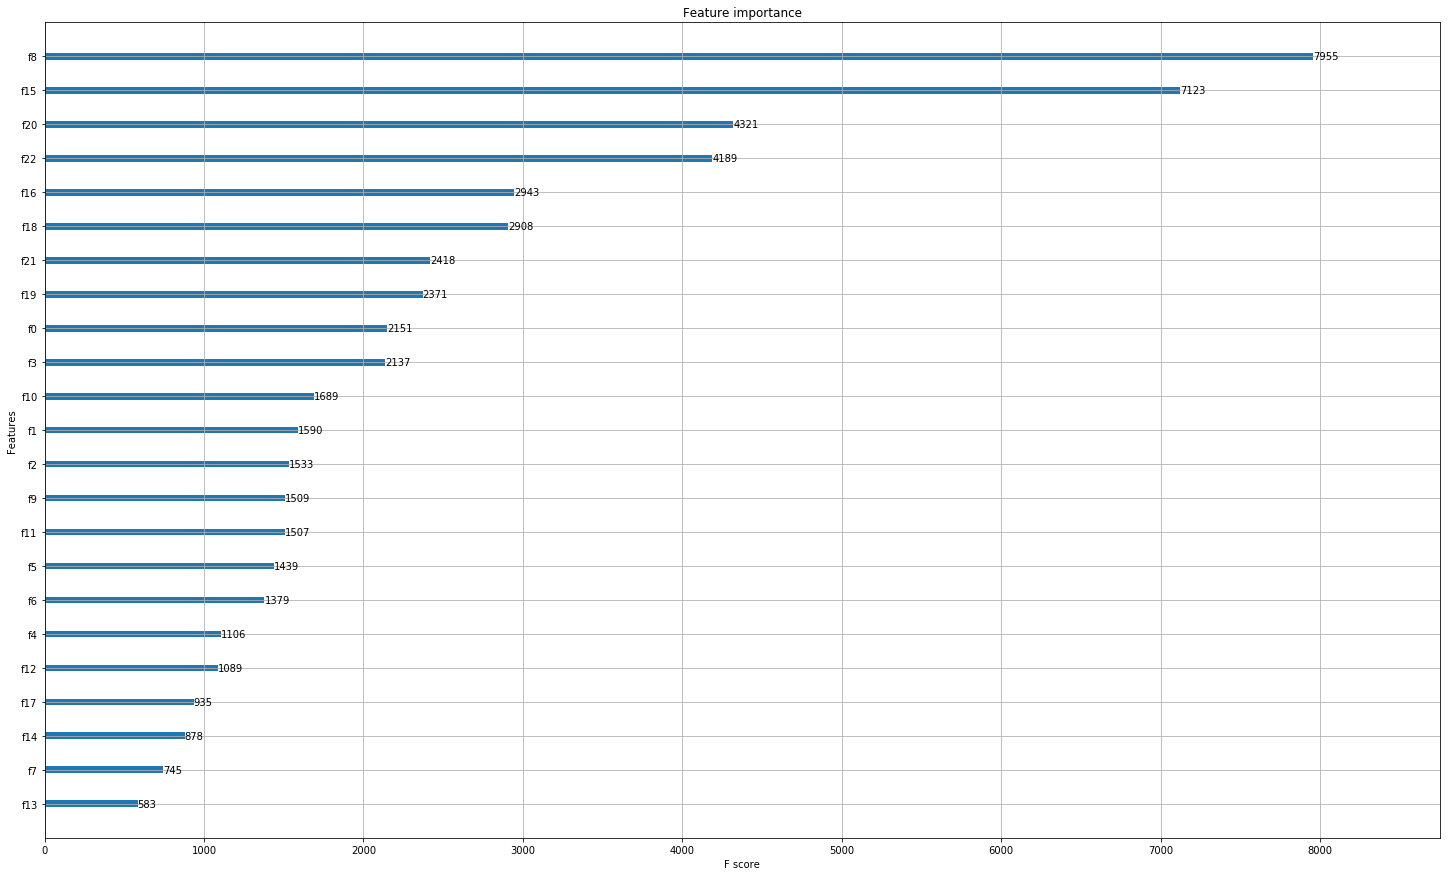

In [72]:
plot_importance(model, max_num_features=None)
#plot_tree(model, num_trees=2) 
#to_graphviz(model, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(25, 15)
#fig = plt.figure(figsize=(16,8),dpi=100)
plt.show()
#plt.savefig('sample_maxdipth10.pdf')
